In [ ]:
import numpy as np
from scipy.optimize import fmin
import astropy.units as u
import astropy.constants as c

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# change plotting defaults
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['axes.grid'] = True

# Dark Matter

### Original by M. Baer and SDSU Astr109 Lab Materials
### Edited and Updated by A. Tedeschi


## Step 0. Background & Motivation

In this activity, you will be computing the *total mass* of the galaxy NGC 2742, and comparing/contrasting this against the mass one would estimate from the matter we can see, otherwise known as the *luminous mass*. Since the overwhelming majority of this mass is represented by stars, this is also referred to as a galaxy's *stellar mass*. To do this, you will be using real rotation data collected by Vera Rubin et al. in 1985, and an analytical model of the galaxy's integrated light.

**Optional Portion:** For the second step of this activity, you may choose to use $\chi^2$ minimization to better constrain your model parameters. For a tutorial on this technique, check out [this video](https://www.youtube.com/watch?v=TSNV-4K3Fws) by Prof. Quimby.

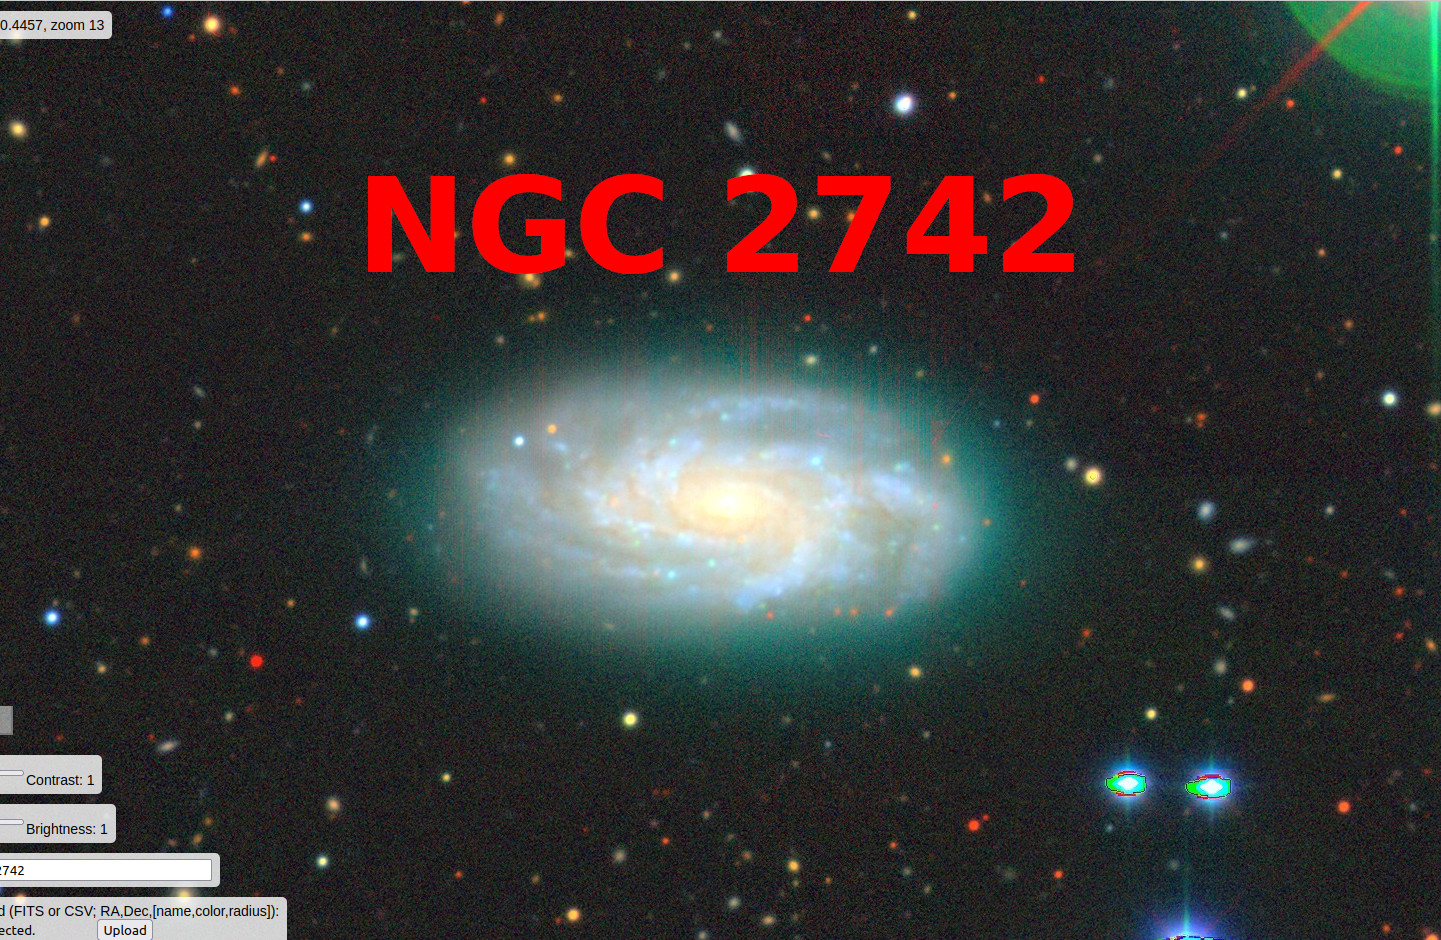

## Step 1. Compute a Cumulous Luminosity Distribution

In order to determine the luminous mass of a galaxy, we need (1) a map of its surface brightness (or luminosity per unit area), and (2) knowledge of how much mass is associated with a given amount of starlight.  Measuring these is hard work.  To make your life easier, for (1) you can utilize this formula for the luminosity contained with a radius $R$ from the center, otherwise known as a cumulous luminosity distribution (CLD):

$$
    L_R = 2\pi h^2\Sigma_0\left[1 - e^{-R/h}\left(1 + \frac{R}{h}\right)\right].
$$

Here, $L_R$ is the luminosity contained within $R$, and $h = 3.8\:\mathrm{kpc}$ is a scale length (the distance in $R$ space across which $L_R$ decreases by a factor of $e$).  The parameter $\Sigma_0 = 6.725\times10^7\:\mathrm{L_\odot} / \mathrm{kpc}^2$ is the surface brightness at the center of the galaxy (the stellar luminosity per unit area). Use the cells below to write a function that computes $L_R(R)$.

**NOTE:** The numerical values of $h$ and $\Sigma_0$ given above are measured specifically for NGC 2742.

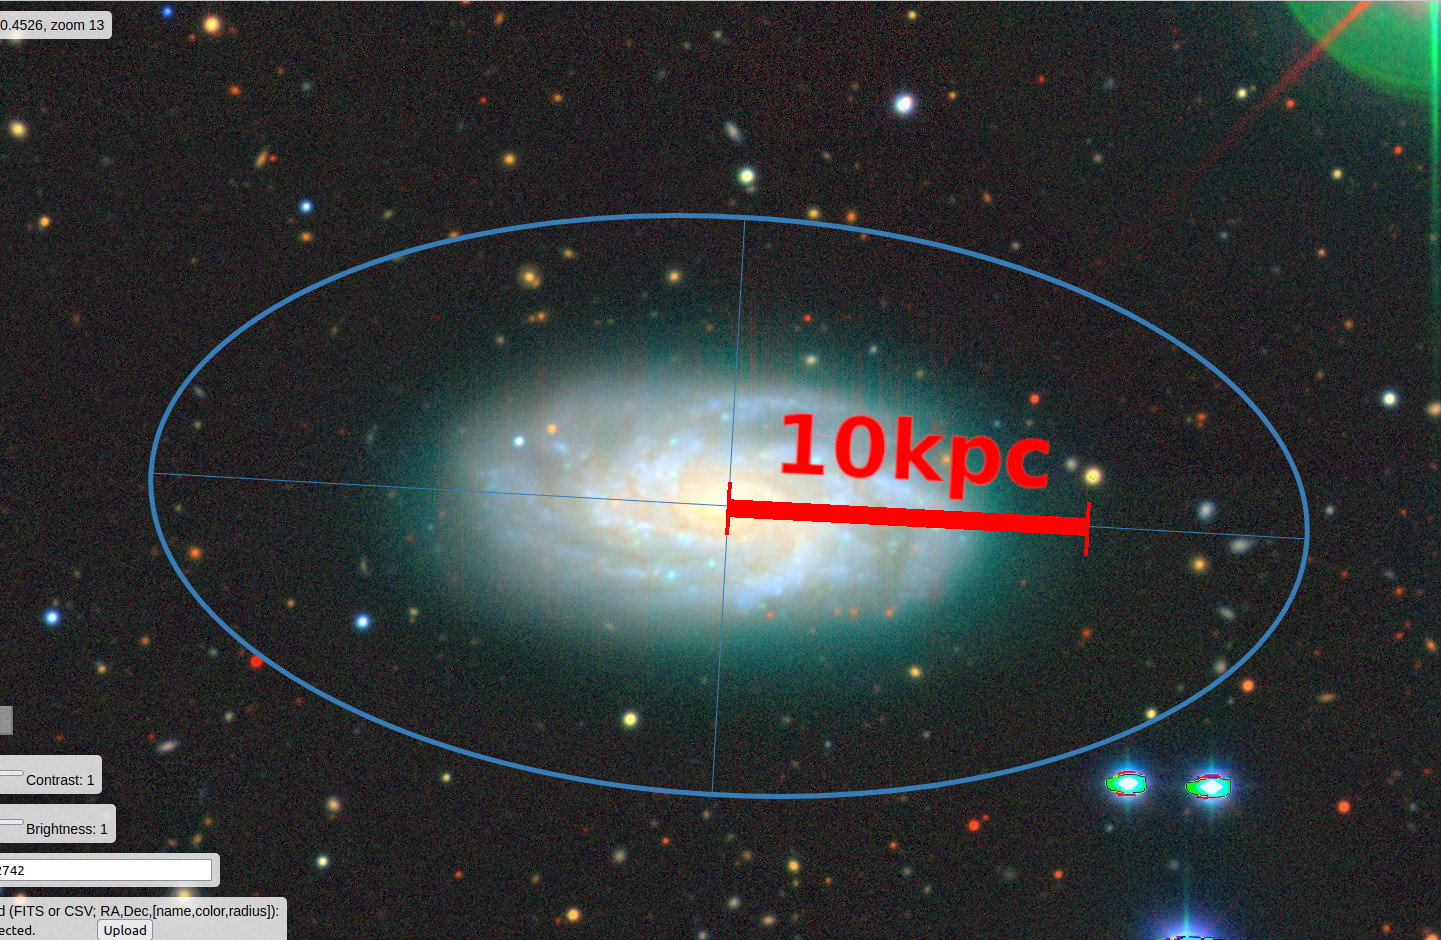

In [ ]:
# compute the CLD as a function of radius from 0-10kpc


In [ ]:
# plot the CLD

## Step 2. Compute a Mass from Light

In order to compute the luminous (stellar) mass from our CLD, we will need a stellar mass-to-light ratio $\left(\Upsilon \equiv \frac{M_\star}{L}\right)$, which is the mass per unit luminosity produced by the stars in a galaxy. If given this quantity, the luminous mass can then simply be computed as:

$$
    M_\star = \Upsilon L_R
$$

For simplicity, we can assume here a typical value of $\Upsilon = 2.0\:\mathrm{M_\odot}/\mathrm{L_\odot}$, and that this value is constant as a function of stellar luminosity.

<b>Make sure to compute your result in Solar masses.</b>

In [ ]:
# compute the luminous mass as a function of radius


In [ ]:
# plot the mass from 0-10 kpc


## Step 3. Compute a Rotation Curve

Provided in an ASCII file in this directory is data for the rotation curve of the galaxy NGC 2742 provided by [Rubin et al. 1985](https://ui.adsabs.harvard.edu/abs/1985ApJ...289...81R/abstract).

In [ ]:
data = np.genfromtxt('ngc2742rv.dat', comments='#', names='r, v, err') # make note of the keys
plt.errorbar(data['r'], data['v'], data['err'], marker='o', c='k', ls='none')
plt.xlabel('Radius from center (kpc)')
plt.ylabel('Rotation velocity (km/s)');

In the field of astronomy, we often like to find trends in data. This may be done by fitting a curve to the observed datapoints. Typically, we have to determine the nature of the fitted function ourselves, but you can use the following relation to fit the Rubin et al. data:

$$
    V = aR^b
$$

where $V$ is the rotation velocity in km/s, $R$ is the radius measured from the galaxy's center in kpc, and $a$ and $b$ are constants that you will vary to get a good fit. First, try to get a fit by eye utilizing `matplotlib` to visualize how the parameters $a, b$ change the fit of the curve to the data.

In [ ]:
# define your model
def rotation_model(params, rs):
    a,b = params
    vs = ????
    return vs

In [ ]:
# try a fit by-hand; plot your results to check as you go
params = (????)

rmod = ????
vmod = rotation_model(????)

### Optional Step 3.5: $\chi^2$ Minimization

You may utilize $\chi^2$ minimization to obtain best-fit values for the parameters $a$ and $b$ in a more numerically robust way. Remember:

$$
    \chi^2 = \sum_i\left(\frac{\Delta Y_i}{\sigma_i}\right)^2
$$

In [ ]:
# write a chi-squared evaluation function**
def get_chisq(params, data):
    model = ????
    dRV = ????
    return ????

In [ ]:
# test your code**
get_chisq(????)

In [ ]:
# get best-fit parameters with chi-square minimization**
params = fmin(get_chisq, params, args = (data,))

In [ ]:
# evaluate a model**
vmod = rotation_model(????)
chisq = get_chisq(????)

# plot your best-fit model vs. data**
????

#**remember that these steps are all optional; if you get stuck, feel free to use your
#  parameters you evaluated by hand!

## Step 4. Compute a Mass From Rotation

As discussed in the lectures by Prof. Sandquist on gravity, rotation velocity and mass contained within a given radius $\left(M\right)$ are related in the following way:

$$
    M = \frac{V^2R}{G}
$$

where $G$ is Newton's gravitational constant. This value is available in `astropy.constants`. **Make sure you're using the correct units to compute a result in Solar masses.**

In [ ]:
# compute the total mass from rotation
????

## Step 5. Compare the Two Results

On the same graph, plot the total mass computed from rotation and the luminous mass vs. $R$. Optional: You may want to make this a semi-log plot (i.e. make the y-axis scale logarithmic).

In [ ]:
# make a plot of your total from rotation and luminous mass
????

What do you notice about these curves? How and where are they similar or different?  Is this surprising? Why or why not?

## Conclusions

Over the course of this program, you've been introduced to the concept of dark matter, and its importance in galaxy formation. However, the discovery of dark matter was no mean feat. As its name implies, dark matter does not absorb nor reflect electromagnetic radiation (light), so we cannot rely on visual detection of this matter. Instead, our knowledge of the laws of gravity and motion led to the discovery of dark matter.

Vera Rubin's result, which you have just replicated, shows a <b>wide</b> discrepancy between the mass that we can visually observe and the mass that is actually present in the galaxy. They suggest that a <b>majority</b> of the mass in the universe cannot be explained by normal "baryonic" matter. Astronomers dub this invisible mass "Dark Matter". As far as we can tell, dark matter cannot interact via the electro-magnetic force, meaning that it is invisible and intangible. As mentioned before, we only detect its presence by observing its gravitational effects.

As of now, astronomers still do not know what dark matter is, but perhaps one of you can find that out in the future.